# Bar Chart Examples

In [2]:
import altair as alt

In [2]:
# Uncomment/run this line to enable Altair in the classic notebook (not JupyterLab)
# alt.renderers.enable('notebook')

In [3]:
from vega_datasets import data
population = data.population()

y2k_pop = population.query('year == 2000')

## Single bar chart

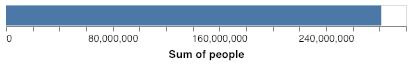

In [4]:
alt.Chart(y2k_pop).mark_bar().encode(
    x='sum(people)',
)

## Bar chart

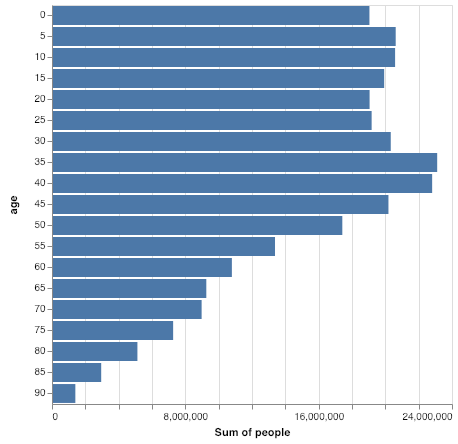

In [5]:
alt.Chart(y2k_pop).mark_bar().encode(
    x='sum(people)',
    y='age:O'
)

## Pandas Series to sorted bar chart

In [6]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
data['counts'] = pd.Series(np.round(100 * np.abs(np.random.randn(8))))
data.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
data['title'] = data.index
data

counts title
a    44.0     a
b     8.0     b
c    55.0     c
d    70.0     d
e    66.0     e
f   311.0     f
g   113.0     g
h    63.0     h

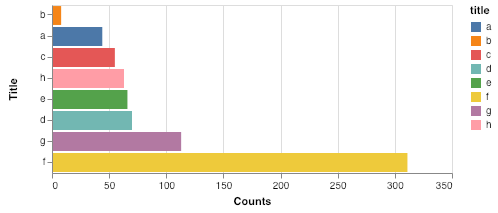

In [7]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('counts', axis=alt.Axis(title='Counts')),
    y=alt.Y('title',
        sort=alt.EncodingSortField(field='counts', order='ascending', op='sum'),
        axis=alt.Axis(title='Title')
    ),
    color=alt.Color('title:N')
)

## Stacked bar chart

In [8]:
chart = alt.Chart(y2k_pop).mark_bar().encode(
    x='age:O',
    y='sum(people):Q',
    color=alt.Color('sex:N', scale=alt.Scale(range=["#e377c2","#1f77b4"]))
)
chart

In [9]:
chart = alt.Chart(population).transform_filter(
    "datum.year == 2000"
).transform_calculate(
    "sex", "datum.sex == 1 ? 'Male' : 'Female'"
).encode(
    color=alt.Color('sex:N', scale=alt.Scale(range=["#e377c2","#1f77b4"]))
)

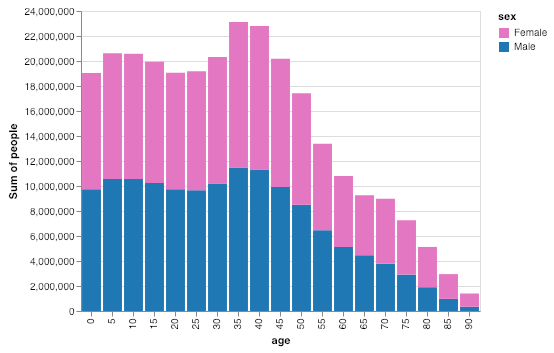

In [10]:
chart.mark_bar().encode(
    x='age:O',
    y='sum(people):Q',
)

## Layered bar chart

Re-using the transform from above:

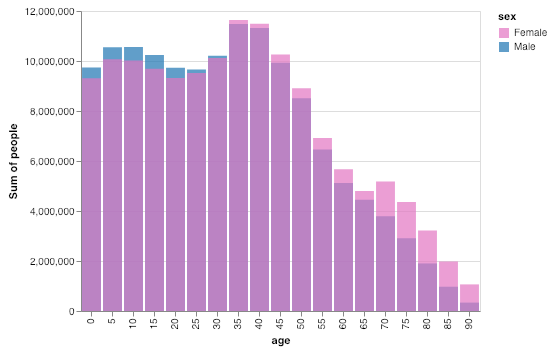

In [11]:
chart.mark_bar().encode(
    x='age:O',
    y=alt.Y('sum(people):Q', stack=None),
    opacity=alt.value(0.7)
)

## Normalized stacked bar chart

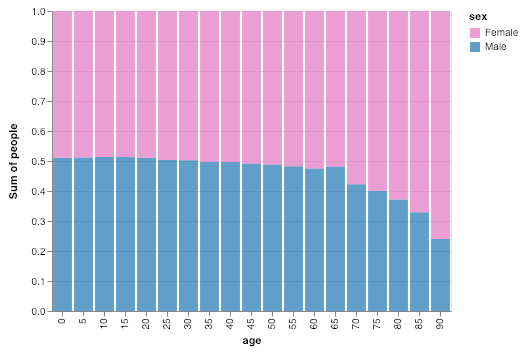

In [12]:
chart.mark_bar().encode(
    x='age:O',
    y=alt.Y('sum(people):Q', stack='normalize'),
    opacity=alt.value(0.7)
)

## Grouped bar chart

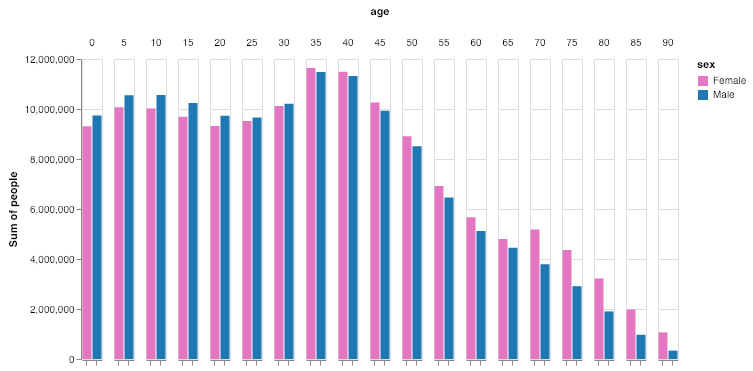

In [13]:
chart.mark_bar().encode(
    alt.X('sex:N', axis=alt.Axis(title=None, labels=False)),
    alt.Y('sum(people):Q'),
    alt.Column('age:O')
).properties(
    width=20  # width of one column facet
)

## Histogram

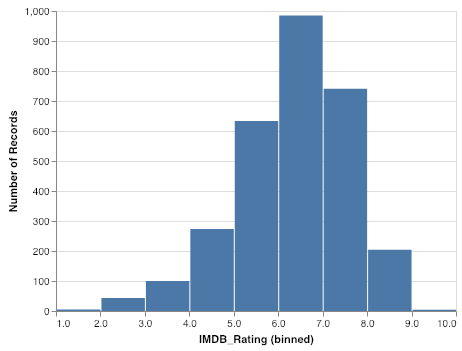

In [14]:
from vega_datasets import data
movies = data.movies()

alt.Chart(movies).mark_bar().encode(
    x=alt.X('IMDB_Rating', bin=alt.Bin(maxbins=10)),
    y='count(*):Q',
)

# Top K Items

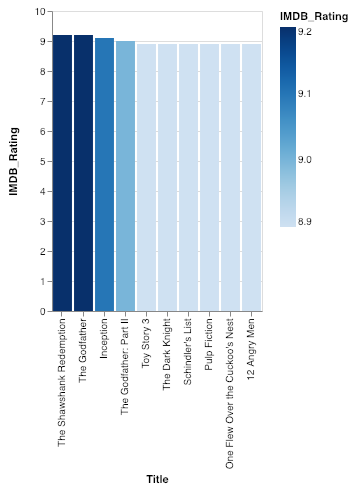

In [16]:
from vega_datasets import data
movies = data.movies()


# Top 10 cars by miles per gallon
alt.Chart(
    movies,
).mark_bar().encode(
    x=alt.X('Title:N', sort=alt.EncodingSortField(field="IMDB_Rating", op="mean", order='descending')),
    y=alt.Y('IMDB_Rating'),
    color=alt.Color('IMDB_Rating')
    
).transform_window(
    rank='rank(IMDB_Rating)',
    sort=[alt.SortField('IMDB_Rating', order='descending')]
).transform_filter(
    (alt.datum.rank < 10)
)